# Probabilidad - Variables aleatorias contínuas

X es una variable aleatoria continua si toma valores en un conjunto infinito no numerable. 

Se define la función de distribucion de X, F(X), como la probabilidad según la cual X tomará un determinado valor. Esta función mide la probabilidad en un intérvalo, no tendría sentido decir exactamente un punto, ya que la probabilidad seria practicamente nula.

P(a ≤ x ≤ b)

Com que és contínua s'evalua en un interval, per un punt no tindria sentit.

També es compleix que cada interval la prob<1 i en l'interval sencer = 1

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

### Distribución uniforme contínua

Sea X una variable aleatoria continua, diremos que esta tiene una distribución uniforme
continua si toma valores xi є [a,b] de manera equiprobable, donde -∞ < a < b < ∞.

In [2]:
# Ejemplo: La línea de metro L5 pasa cada 10min. 
# Cual es la probabilidad de que, cuando llegue a la estación, pase un metro en menos de 3 minutos?

# Lo que hemos comentado, fijaros que como es contínua miramos un intervalo de tiempo (mas de 3min)
# No tendría sentido decir exactamente 3min, ya que la probabilidad seria practicamente nula.
# A parte que 2,99 también cuenta o no?

stats.uniform.cdf(3, 0, 10)  # cdf = cumulative distribution function
                             # Siempre te dice la probabilidad de que midas menos de lo que le pones

0.3

In [3]:
# Efectivamente, la probabilidad de que pase un tren en 10min es 1

stats.uniform.cdf(10, 0, 10)

1.0

In [4]:
muestras = 10000
#resultados_tren = np.random.uniform(0, 10, size=muestras)
resultados_tren = stats.uniform.rvs(0, 10, size=muestras)
resultados_tren

array([5.47900018, 9.87845419, 5.00459113, ..., 7.5963245 , 4.13995262,
       7.72679344])

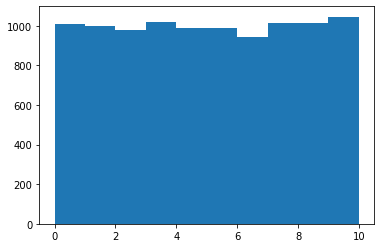

In [5]:
plt.hist(resultados_tren)
plt.show()

### Distribución normal
Es la distribución más común, ya que en la vida real podemos encontrar multitud de fenómenos que se comportan según esta distribución.

In [6]:
# Ejemplo: Las alturas de los alumnos de la KSCHOOL se distribuyen mediante una normal.
# La media es mu = 1.7, y la desviación estandard es sigma = 0.15 
     # --> estos parámetros pueden darnoslos o los calculamos segun los datos
    
mu = 1.7
sigma = 0.15

stats.norm.cdf(1.8, mu, sigma) # Siempre te dice la probabilidad de que midas menos de lo que le pones

0.7475074624530773

In [7]:
# Cual es la prob de que mida mas de 1.9?
1 - stats.norm.cdf(1.9, mu, sigma) # Enseñar en la pizarra con grafico

0.09121121972586788

In [8]:
# Cual es la prob de que mida entre 1.8 y 1.9?
stats.norm.cdf(1.9, mu, sigma) - stats.norm.cdf(1.8, mu, sigma)

0.16128131782105481

In [9]:
muestra = 10000
resultados_altura = stats.norm.rvs(mu, sigma, size=muestra)
resultados_altura

array([1.70037031, 1.94009654, 1.75760216, ..., 1.88534279, 1.80885554,
       1.32267192])

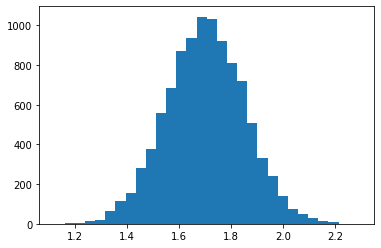

In [10]:
plt.hist(resultados_altura, bins = 30)
plt.show()

In [11]:
# Supongamos que es el caso contrario. Tenemos unos datos y sospechamos que tienen una distribución normal. 
# Vamos a calcular mu y sigma.
dict_aula = {'nombres': ['Marc', 'Anna', 'Maria', 'Paula', 'Jordi', 'Marta'],
             'sexo': ['H', 'M', 'M', 'M', 'H', 'M'],
             'altura': [1.8, 1.7, 1.5, 1.7, 1.7, 1.6]}

df_aula = pd.DataFrame(dict_aula)
df_aula

,nombres,sexo,altura
0,Marc,H,1.8
1,Anna,M,1.7
2,Maria,M,1.5
3,Paula,M,1.7
4,Jordi,H,1.7
5,Marta,M,1.6


In [12]:
mu = df_aula['altura'].mean()
sigma = df_aula['altura'].std()
print(mu, sigma)

1.6666666666666667 0.10327955589886445


# Distribución exponencial
Diremos que X tiene una distribución exponencial si estudia el tiempo que pasa entre dos sucesos consecutivos de una distribución de Poisson.

Mientras que la distribución de Poisson describe las llegadas por unidad de tiempo, la distribución exponencial estudia el tiempo entre cada una de estas llegadas. La distribución de Poisson es discreta, pero la distribución exponencial es continua porque el tiempo entre llegadas no tiene que ser un número entero. 

En el ejemplo de la última clase, la poisson miraba cuantos emails por hora, mientras que una exponencial serviría para mirar cuanto tiempo entre emails.

In [13]:
# Ejemplo: La bateria de un modelo de movil falla despues de 365 días de uso.
#     Cual es la probabilidad de que aguante más de 400 días sin fallar?

# igual que con la poisson, necesitamos calcular lambda. En este caso lambda es el tiempo de la ocurrencia = 365 dias

lmbda = 365
1 - stats.expon.cdf(400, 0, lmbda) # Siempre te dice la probabilidad de que falle antes del dia que le has puesto

0.3342418617938393

In [14]:
# Cual es la probabilidad de que falle entre el día 400 y el dia 420?

stats.expon.cdf(420, 0, lmbda) - stats.expon.cdf(400, 0, lmbda)

0.01782189265922607

In [15]:
muestra = 10000
resultados_movil = stats.expon.rvs(0, lmbda, size=muestra)
resultados_movil

array([273.56332283, 798.56851074,  26.03095746, ...,  22.17964347,
       208.96533258, 120.21409951])

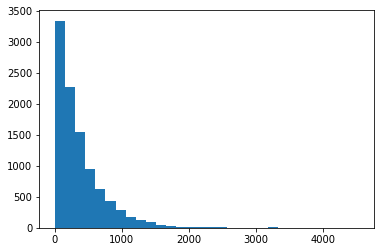

In [16]:
plt.hist(resultados_movil, bins = 30)
# Cada vegada n'aguanten menys
# Que fallin despres de 0 dies, tots
# Que fallin despres de 100 dies, quasi tots
# Que fallin despres de 500 dies, pocs
plt.show()

# Ejemplo
La altura de los de la clase, la duración de la batería de un movil, ... son ejemplos teoricos de las distribuciones.

A la practica tendremos un histograma y segun la forma tenemos que deducir que distribución tienen esos datos.

Vamos a ver un ejemplo con una distribución normal, puesto que es la más típica.

Con el pairplot ver todos los histogramas y decidir que variables tienen una distribucion más normal. 

Estudiar la distribución normal de "metros" y "precio".
  - Calcular mu y sigma.
  - Generar una distribución normal con esos parámetros y comparar los histogramas.
  - Si escojo un piso al azar, cual es la probabilidad de que tenga mas de 100m2?
  - Si escojo un piso al azar, cual es la probabilidad de que cueste entre 100.000€ y 200.000€?

In [17]:
casas = pd.read_csv('datasets/house_pricing.csv')

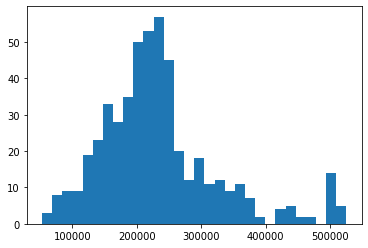

In [18]:
plt.hist(casas['precio'], bins = 30)
plt.show()